# <span style='color:darkcyan'> MIDTERM PROJECT </span>
## <span style='color:darkcyan'> Dataset URL: https://archive.ics.uci.edu/ml/datasets/automobile </span>

This data set consists of three types of entities:
<br>(a) the specification of an vehicle in terms of various characteristics,
<br>(b) its assigned insurance risk rating,
<br>(c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

<br>
The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.
<br>

Note: Several of the attributes in the database could be used as a "class" attribute.



## <span style='color:darkcyan'> 1. Importing libraries </span>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
start = time.time()

## <span style='color:darkcyan'> 2. Importing data<span style='color:green'>

In [2]:
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
missing_values = ["n.a.","NA","n/a", "na", '?']
colnames = ['Symboling', 'normalized_losses', 'make', 'fuel-type', 'aspiration', 'num_of_doors',
           'body_style','drive_wheels','engine_location','wheel_base','length','width','height',
           'curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore',
           'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

Vehicle = pd.read_csv(url, names=colnames, na_values= missing_values)

Vehicle.head()

,Symboling,normalized_losses,make,fuel-type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## <span style='color:darkcyan'> 3. Preprocessing <span style='color:green'>

In [3]:
Vehicle.shape

(205, 26)

### <span style='color:darkcyan'> 3.1. Data types<span style='color:green'>

In [4]:

Vehicle.dtypes

Symboling              int64
normalized_losses    float64
make                  object
fuel-type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [5]:
Vehicle.describe()

,Symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### <span style='color:darkcyan'> 3.2. Check for missing values<span style='color:green'>

In [6]:
Vehicle.isna().sum()

Symboling             0
normalized_losses    41
make                  0
fuel-type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

There are many missing values in normalized_losses. Therefore, instead of removing them , we can take the mean.
 We can remove the missing values from other columns or take the mean. Since, number of rows is less - we can take the mean.
For categorical values - take the most common value of the column.

### <span style='color:darkcyan'> 3.2. Filling the mising values(cleaning) <span style='color:green'>

In [7]:
Vehicle['normalized_losses'].fillna(int(Vehicle['normalized_losses'].mean()), inplace=True)

Vehicle['bore'].fillna(int(Vehicle['bore'].mean()), inplace=True)

Vehicle = Vehicle.apply(lambda x: x.fillna(x.value_counts().index[0]))

Vehicle['stroke'].fillna(int(Vehicle['stroke'].mean()), inplace=True)

Vehicle['horsepower'].fillna(int(Vehicle['horsepower'].mean()), inplace=True)

Vehicle['peak_rpm'].fillna(int(Vehicle['peak_rpm'].mean()), inplace=True)

Vehicle['price'].fillna(int(Vehicle['price'].mean()), inplace=True)

We can see below that there are no missing values in the dataset head. Let's check if there are any other null values in rest of the dataset

In [8]:
Vehicle.head()

,Symboling,normalized_losses,make,fuel-type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


As we can see below there are no null values

In [9]:
Vehicle.isna().sum()

Symboling            0
normalized_losses    0
make                 0
fuel-type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

## <span style='color:darkcyan'> 4. Exploratory Data Analysis <span style='color:green'>

### <span style='color:darkcyan'> 4.1 Distribution of prices in car dataset <span style='color:green'>

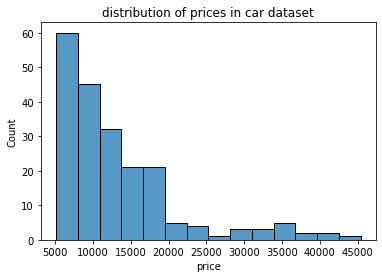

In [10]:

sns.histplot(Vehicle["price"])
plt.title("distribution of prices in car dataset")
plt.show()

### <span style='color:darkcyan'> 4.2 Distribution of DistSymboling, normalized_losses, wheel_base, length, width, height, curb_weight, engine_size, bore, stroke, compression_ratio, horsepower, peak_rpm,city_mpg, highway_mpg, price    <span style='color:green'>
   

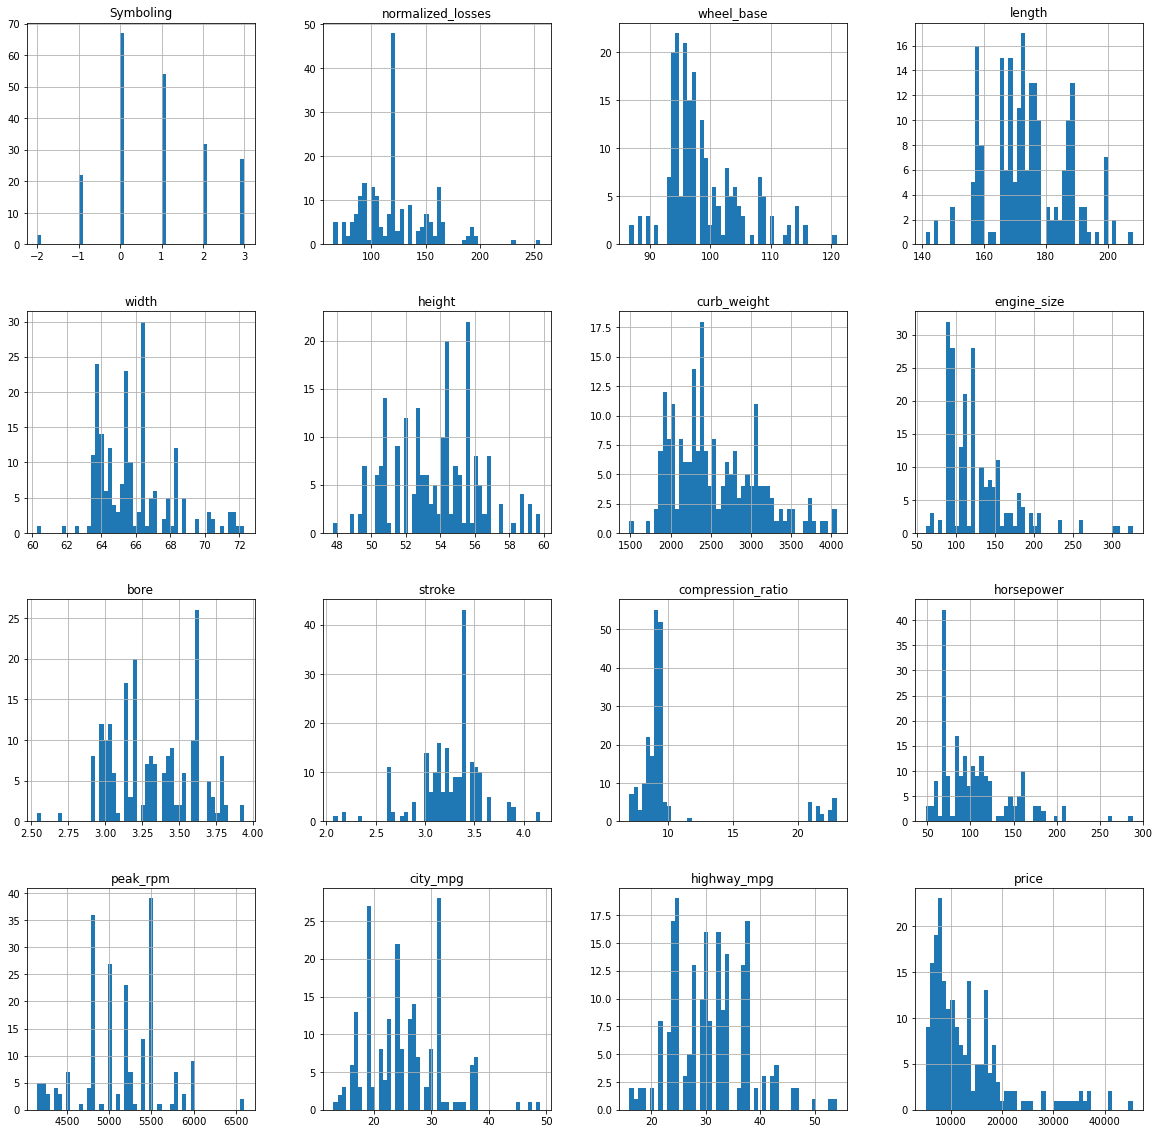

In [11]:

Vehicle.hist(bins = 50 , figsize = (20,20))
plt.show()

### <span style='color:darkcyan'> 4.3 Fuel Types </span>

We can see most preferred fuel-type is gas

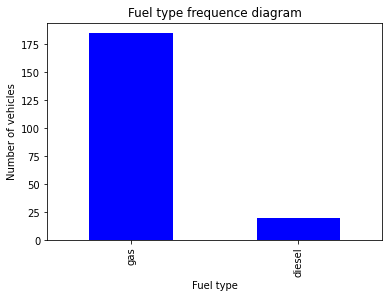

In [12]:
Vehicle['fuel-type'].value_counts().plot(kind='bar',color = 'blue' )
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type')
plt.show()

### <span style='color:darkcyan'> 4.4 Distribution of prices in car dataset </span>

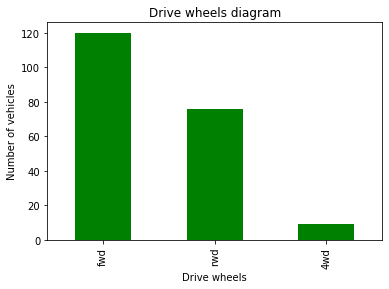

In [13]:
Vehicle['drive_wheels'].value_counts().plot(kind='bar',color='green')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels')
plt.show()

### <span style='color:darkcyan'> 4.5 Distribution of curb weight </span>

We can see maximum number of vehicles have curb weight between 2000 to 2500

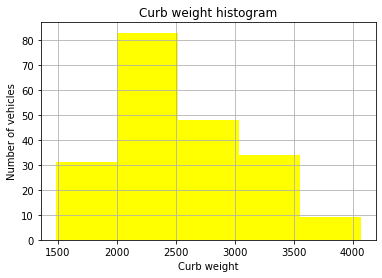

In [14]:
Vehicle['curb_weight'].hist(bins=5,color='yellow');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight')
plt.show()


### <span style='color:darkcyan'> 5. Changes of different attributes with price </span>

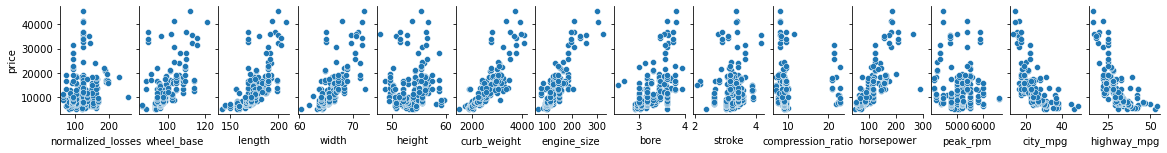

In [15]:

g=sns.pairplot(Vehicle, x_vars=['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm','city_mpg', 'highway_mpg'], y_vars=["price"],aspect=1);
g.fig.set_size_inches(16,2)


We can see that there is some linear relationship between price and wheel,base_length, width, curb_weight, engine_size, bore, horse_power, city_mpg and highway_mpg
<br>



So let's draw these plots separately for clear view.

### <span style='color:darkcyan'> 5.1 Price vs wheel_base </span>

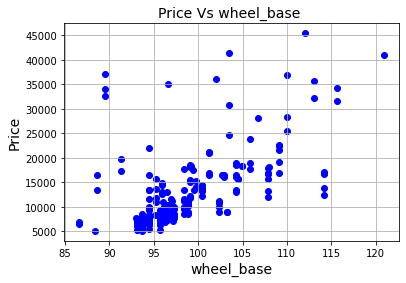

In [16]:
plt.scatter(Vehicle['wheel_base'], Vehicle['price'], color='blue')
plt.title('Price Vs wheel_base ', fontsize=14)
plt.xlabel('wheel_base', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

### <span style='color:darkcyan'> 5.2 Price vs width </span>

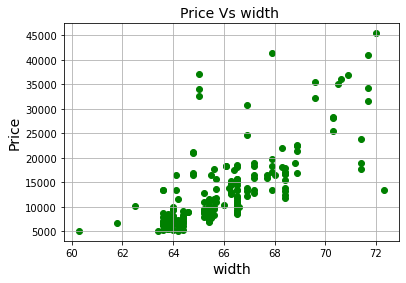

In [17]:
plt.scatter(Vehicle['width'], Vehicle['price'], color='green')
plt.title('Price Vs width ', fontsize=14)
plt.xlabel('width', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

### <span style='color:darkcyan'> 5.3 Price vs curb_weight </span>

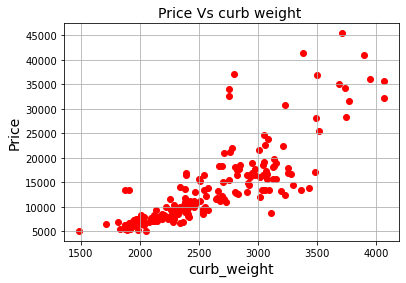

In [18]:
plt.scatter(Vehicle['curb_weight'], Vehicle['price'], color='red')
plt.title('Price Vs curb weight ', fontsize=14)
plt.xlabel('curb_weight', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

### <span style='color:darkcyan'> 5.4 Price vs engine_size </span>

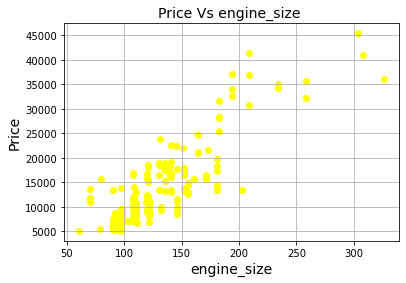

In [19]:
plt.scatter(Vehicle['engine_size'], Vehicle['price'], color='yellow')
plt.title('Price Vs engine_size ', fontsize=14)
plt.xlabel('engine_size', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

### <span style='color:darkcyan'> 5.5 Price vs bore </span>

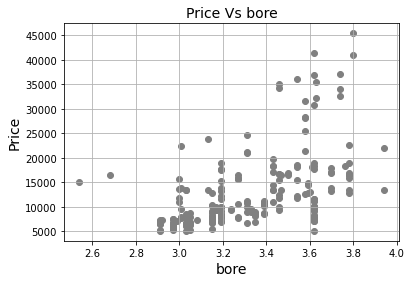

In [20]:
plt.scatter(Vehicle['bore'], Vehicle['price'], color='grey')
plt.title('Price Vs bore', fontsize=14)
plt.xlabel('bore', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

### <span style='color:darkcyan'> 5.6 Price vs horsepower </span>

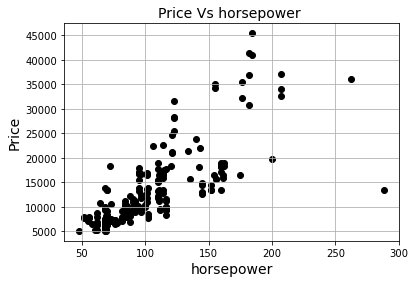

In [21]:
plt.scatter(Vehicle['horsepower'], Vehicle['price'], color='black')
plt.title('Price Vs horsepower ', fontsize=14)
plt.xlabel('horsepower', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

### <span style='color:darkcyan'> 5.7 Price vs city_mpg </span>

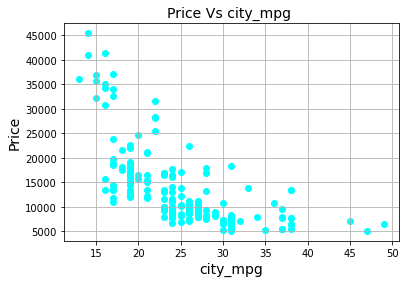

In [22]:
plt.scatter(Vehicle['city_mpg'], Vehicle['price'], color='cyan')
plt.title('Price Vs city_mpg ', fontsize=14)
plt.xlabel('city_mpg', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

### <span style='color:darkcyan'> 5.8 Price vs highway_mpg </span>

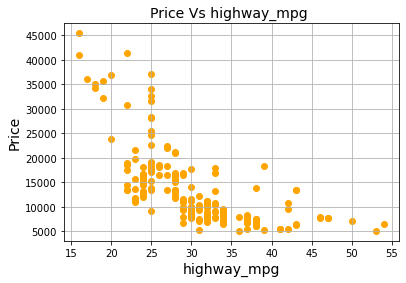

In [23]:
plt.scatter(Vehicle['highway_mpg'], Vehicle['price'], color='orange')
plt.title('Price Vs highway_mpg ', fontsize=14)
plt.xlabel('highway_mpg', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

From the above data we can see some are directly proportional to the price, while some are inversely proportional



## <span style='color:darkcyan'>5.9 Heat map to see how </span>

we can see below that curb weight is proportional to length, width, engine size and price

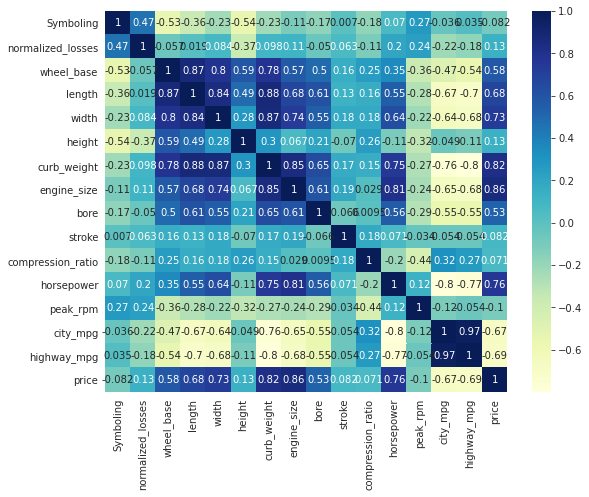

In [24]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    corr = Vehicle.corr()
    ax = sns.heatmap(corr, cmap="YlGnBu",linecolor='red', annot=True)
#ax = sns.heatmap(uniform_data)

## <span style='color:darkcyan'> 5.10 Symboling vs price </span>

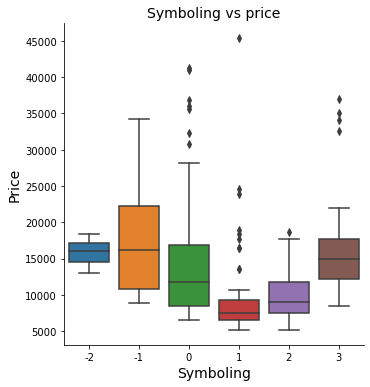

In [25]:

sns.catplot(x="Symboling", y="price", kind="box", data=Vehicle)
plt.title('Symboling vs price', fontsize=14)
plt.xlabel('Symboling', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

## <span style='color:darkcyan'> 5.11 Symboling vs Normalized_losses </span>

As seen below, cars become more risky when the losses increase 

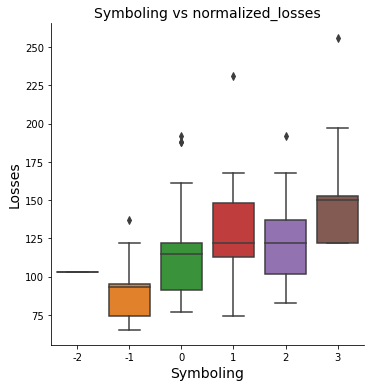

In [26]:
sns.catplot(x="Symboling", y="normalized_losses", kind="box", data=Vehicle)
plt.title('Symboling vs normalized_losses', fontsize=14)
plt.xlabel('Symboling', fontsize=14)
plt.ylabel('Losses', fontsize=14)
plt.show()


## <span style='color:darkcyan'> 5.12 Compare normalized loss with num of doors and body style </span>


Normalized loss is the relative average loss payment per insured vehicle year
<br>
We can see here thst normalized loss is more when no. of doors =2

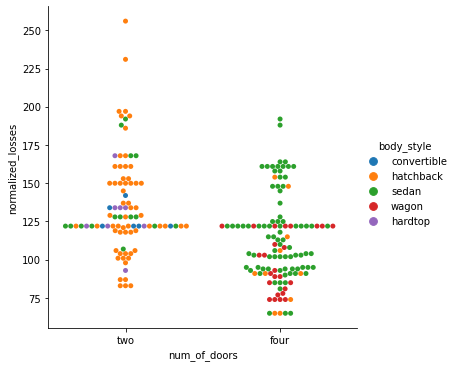

In [27]:
sns.catplot(x="num_of_doors", y="normalized_losses", hue="body_style", kind="swarm", data=Vehicle)

### <span style='color:darkcyan'> 5.13 Compare which cars have the highest price <span style='color:green'>

We can see below that benz manufactures the cars of highest prize.
<br>
Cars costing more than 25000 are bmw, jaguar, benz,porshe
<br>
Cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru

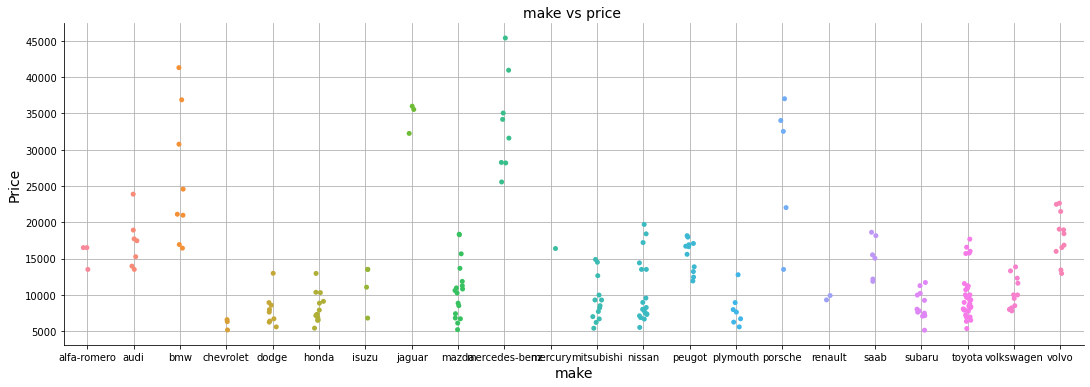

In [28]:

sns.catplot(x="make", y="price", data=Vehicle, height=5, aspect=3)
plt.title('make vs price ', fontsize=14)
plt.xlabel('make', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

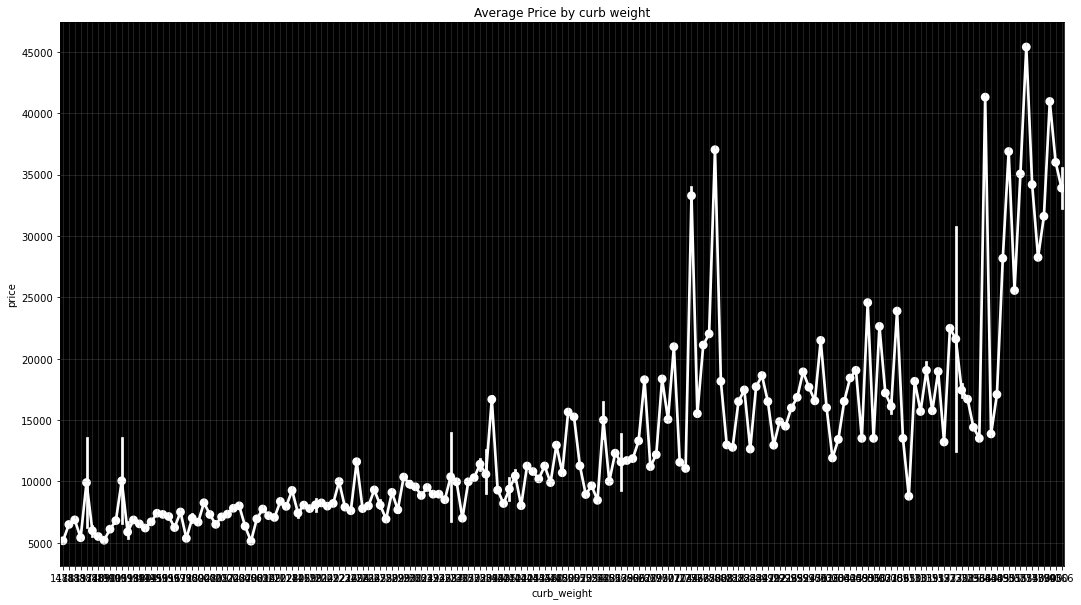

In [30]:
plt.figure(figsize=(18,10))
ax = sns.pointplot(x=Vehicle["curb_weight"],y=Vehicle["price"],color="w") # line is of white color
ax.set_facecolor("k") #background is black
plt.grid(True,color="grey",alpha=.3) # grid is on and its color is grey
plt.title("Average Price by curb weight")
plt.show()

#### Conclusion

##### Analysis of the data set provides:

The distribution of the data set
<br>
The distribution of different attributes of the dataset
<br>
Relation between different attributes of the dataset with price
<br>
Relation between different fields
<br>
Normalized loss
<br>
Factors affecting price
<br>
Correlation between different fields and how they are related
<br>
Normalized loss of the manufacturer
<br>
Importance of drive wheels and curb weight
<br>

In [ ]:
end = time.time()
print(end - start)